In [1]:
import pandas as pd
from utils_function import *
from utils_class import *

In [2]:
graph = dict()
file = pd.read_csv("grafo.txt", sep=' ', header=None)
graph = create_graph(file, graph)

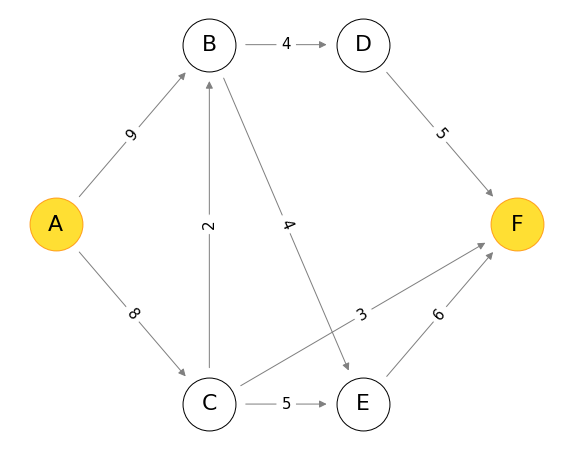

In [3]:
visualization(graph)

In [4]:
def BFS(graph, s, t, path):
    
    visited = set()
    queue = [s]
    visited.add(s)
    if s not in path: path[s] = ()
    while len(queue) > 0:
        source = queue.pop(0)
        neighbors = getNeighborsMinWeight(source, graph)
        for target in neighbors:
            if target not in visited and neighbors[target] > 0:
                queue.append(target)
                visited.add(target)
                path[target] = (source, neighbors[target])
    if t in visited:  return True, path     
    
    return False, path

In [5]:
def minCut(graph, source, target):
    
    # initialize the residual graph creating the backword edges
    res = createResidualG(graph)
    max_flow = 0
    path = dict()
    
    # update the residual graph untill exists a path between soruce and target in the residual graph
    while BFS(res, source, target, path)[0]:
        #find the min weight of edges in the current path
        bottleneck = getBottleneck(path, source, target)
        #update the max-flow
        max_flow += bottleneck
        updateResGraph(res, path, bottleneck, source, target)
    
    print("Max Flow is:", max_flow)
    #find all nodes reachable from source in the final residual graph
    reachable = reachFromS(res, source) 
    edges = set()
    capacity = 0
    
    for v in reachable:
        neighbor = graph[v].get_out_relation
        for target in neighbor:
            relX = res[v].get_out_relation[target] # take the relation in the residual graph
            rely = graph[v].get_out_relation[target] # take the relation in the original graph
            # if we reach an extreme node in the residual graph and its out edge weight is 0 this has to been cut
            if relX.weight == 0 and relX.target not in reachable and (v, relX.target) not in edges:
                edges.add((v, relX.target))
                capacity += rely.weight 
        
    print("Capacity is:", capacity)
    return edges

Max Flow is: 13
Capacity is: 13


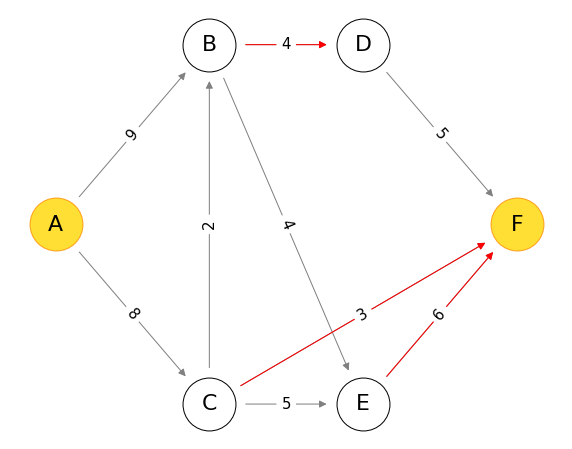

In [6]:
visualization(graph ,cut = minCut(graph, "A", "F"))